선형 회귀에서 회귀 계수를 추정하기 위해서 잔차의 제곱합을 최소로 하는 최소제곱법을 사용한다. 그러나 설명 변수들 간의 상관관계가 높은 경우, 즉 다중공선성이 있는 경우에는 회귀 계수가 회귀 계수의 변동성이 커지는(회귀 계수 추정치의 분산이 증가) 문제점이 발생한다. 또한, 설명 변수의 수가 증가할수록, 변수의 해석력이 떨어지고 과적합이 발생할 수 있다.  **정규화 선형 회귀(Regularized Regression)**는 회귀 계수에 대한 페널티를 추가하여 모형의 Variance를 줄이므로써 모형이 과적합되는 것을 막고 일반화 능력을 높히는 방법으로 크게 3가지 방법이 있다.
* Ridge Regression
* Lasso Regression
* Elastic Net Regression


# Ridge
Ridge는 기존의 최소제곱법에 $l_2 \text{ } norm \text{ } \left\vert\left\vert \beta \right\vert\right\vert_2^2$을 페널티로 추가한다.

$$\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^k \beta_jx_{ij})^2 + \lambda \sum_{j=1}^k \beta_j^2 = RSS +  \lambda \sum_{j=1}^k \beta_j^2, \text{ } \lambda \ge 0$$

![Ridge](https://www.dropbox.com/s/gkeah9r8qbcdmed/Ridge.jpg?raw=1)
$\hat{\beta}$은 OLS의 점, 빨간 영역의 선을 같은 RSS의 선이고 원은 Ridge의 제한 영역이다. Ridge는 이 제한 영역 내에서 가능한 한 작은 RSS를 갖는 $\hat{\beta}$를 추정한다. 즉 추정된 회귀 계수는 해당 제한 영역과 가장 작은 RSS 등고선이 만나는 지점의 값이 된다. Ridge는 $l_2 \text{ } norm$을 사용하기 때문에 원형의 제한 영역을 가지고 있어서 교점이 일반적으로 축 상에 있지 않다. 따라서 Ridge의 회귀 계수 추정치는 0이 되지 않는다.

# Lasso

Lasso는 Ridge와 비슷한 형태이지만 기존의 잔차제곱합에 $l_1 \text{ } norm \text{ } \left\vert\left\vert \beta \right\vert\right\vert_1$을 페널티로 추가한다.
$$\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^k \beta_jx_{ij})^2 + \lambda \sum_{j=1}^k \lvert \beta_j \rvert = RSS +  \lambda \sum_{j=1}^k \lvert \beta_j \rvert, \text{ } \lambda \ge 0$$

![Lasso](https://www.dropbox.com/s/geu4tyejo8hkj71/Lasso.jpg?raw=1)
Lasso 또한 Ridge와 마찬가지로 제한 영역 내에서 가능한 한 작은 RSS를 갖는 $\hat{\beta}$를 추정한다. 그러나 Lasso는 $l_1 \text{ } norm$을 사용하기 때문에 마름모 형태의 제한 영역을 가지고 있어서 Lasso의 회귀 계수 추정치는 0이 될 수 있다. 이 점이 Ridge와 Lasso의 큰 차이점이다. Ridge는 몇몇 변수의 회귀 계수를 0에 가깝게 추정할 수는 있지만 0이 되진 않으므로 모든 변수들을 회귀 직선을 만드는데 사용한다. 그에 반해 Lasso는 몇몇 변수의 회귀 계수를 정확하게 0으로 추정할 수 있으므로(변수 선택의 효과) 중요하지 않은 변수들을 제거하여 해석력에 있어서 Ridge보다 더욱 강력한 장점을 가진다.

## Hyper Parameter $\lambda$
Ridge와 Lasso는 모두 두 가지 다른 기준을 절충한다.
* 최소제곱법에서와 같이 RSS를 작게 만들어 데이터에 잘 적합하는 회귀 계수 추정치를 찾음
* 수축 페널티라 불리는 두번째 항($ \lambda \sum\beta_j^2,\text{  } \lambda \sum \left\vert\beta_j\right\vert$)은 $\beta_0, \cdots, \beta_k$가 0에 가까울 때 작고, 따라서 $\beta_j$의 추정치를 0으로 수축하는 효과가 있음  

Hyper Parameter $\lambda$는 회귀 계수 추정치에 대한 이 두 항의 상대적인 영향을 제어한다(회귀 계수의 크기를 제어)  
    $\lambda \rightarrow 0$, 수축 페널티의 영향이 없어 최소 제곱 추정치와 같아짐  
    $\lambda \rightarrow \infty$, 수축 페널티의 영향이 매우 커져 회귀 계수 추정치가 0으로 접근  
$\lambda$의 값에 따라 회귀 계수 추정치가 달라지므로 적절한 $\lambda$값을 찾는 것이 중요한데, Cross Validation을 통해 최적의 $\lambda$를 찾을 수 있다.

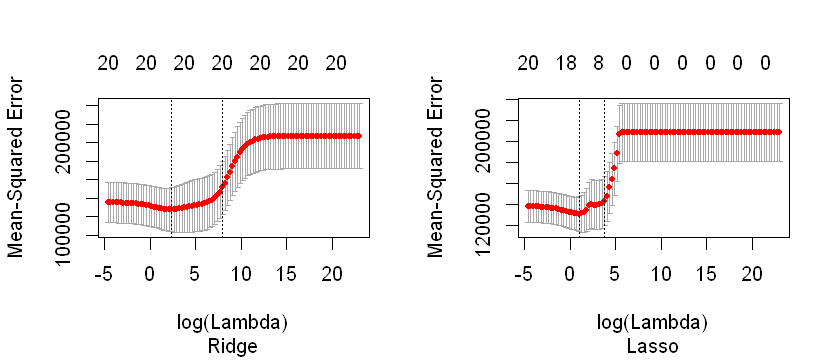

In [2]:
# Load library
library(ISLR)
library(glmnet)
library(ggplot2)
library(dplyr)

# Set plot setting
options(repr.plot.width=7, repr.plot.height=3)
par(mfrow = c(1,2))

# Load data
data(Hitters)

# Remove NA
Hitters <- na.omit(Hitters)

# Transform data
x <- model.matrix(Salary ~ .-1, data = Hitters) # Remove intercept column
y <- Hitters$Salary

# Set seed
set.seed(395)
train.id <- sample(1:nrow(Hitters), 0.7*nrow(Hitters))

# Set hyper parameter lamdba
grid <- 10^seq(10, -2, length=100)

# Search best lambda for ridge
ridge.fit <- cv.glmnet(x[train.id,], y[train.id], alpha = 0, lambda = grid, nfolds = 10)
ridge.lambda <- ridge.fit$lambda.min

# Search best lambda for lasso
lasso.fit <- cv.glmnet(x[train.id,], y[train.id], alpha = 1, lambda = grid, nfolds = 10)
lasso.lambda <- lasso.fit$lambda.min

# Plot lambda search
plot(ridge.fit, sub = "Ridge")
plot(lasso.fit, sub = "Lasso")

<code>cv.glmnet()</code>함수에 $\lambda$를 list형태로 넣어주면 입력한 $\lambda$ list에 대해 10-fold cross validation을 실행하여 최적의 $\lambda$값을 찾아준다.

In [3]:
print(ridge.lambda)
print(lasso.lambda)

[1] 10.72267
[1] 2.656088


최적의 $\lambda$값을 사용해 Ridge와 Lasso의 성능을 검증해보자.

Linear RMSE : 315.3094 
 Ridge RMSE : 303.2178 
 Lasso RMSE : 302.7538

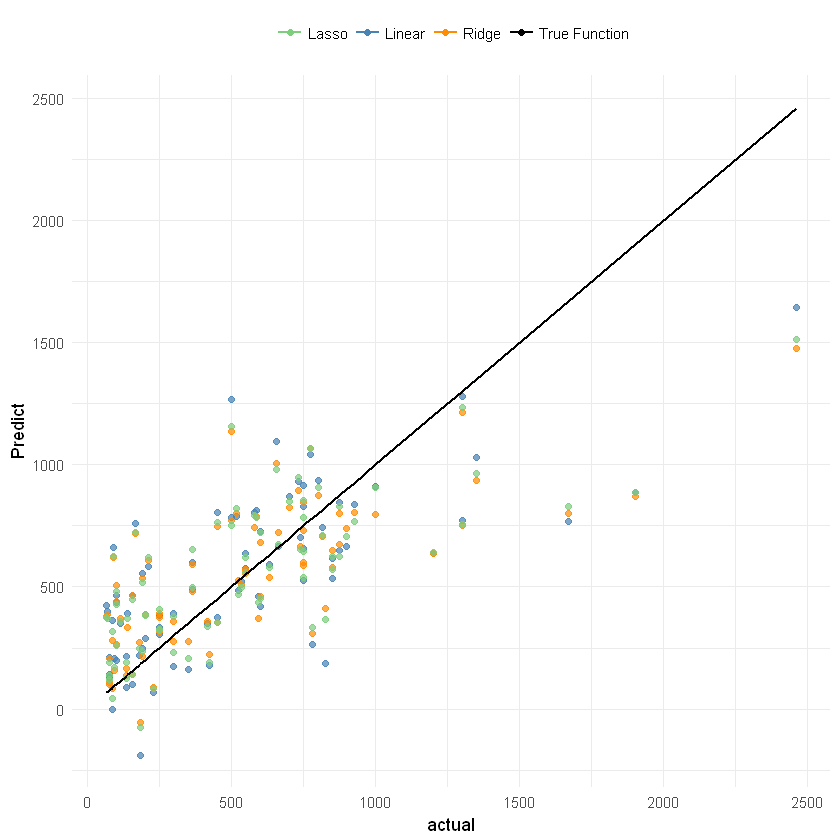

In [4]:
# Train linear Regression
lm.fit <- lm(Salary ~ ., data = Hitters, subset = train.id)

# Predict
lm.pred    <- predict(lm.fit, newdata = Hitters[-train.id,])
ridge.pred <- predict(ridge.fit, s = ridge.lambda, newx = x[-train.id,])
lasso.pred <- predict(lasso.fit, s = lasso.lambda, newx = x[-train.id,])

# Calculate RMSE
cat("Linear RMSE :", sqrt(mean((lm.pred - Hitters[-train.id,]$Salary)^2)), "\n",
   "Ridge RMSE :", sqrt(mean((ridge.pred - Hitters[-train.id,]$Salary)^2)), "\n",
   "Lasso RMSE :", sqrt(mean((lasso.pred - Hitters[-train.id,]$Salary)^2)))

# Plotting
options(repr.plot.width=7, repr.plot.height=7)
data.frame(actual = Hitters[-train.id,]$Salary, lm = lm.pred, ridge = c(ridge.pred), lasso = c(lasso.pred)) %>%
ggplot() + geom_point(aes(actual, lm,  col = 'Linear'), alpha = 0.7) +
geom_point(aes(actual, ridge, col = 'Ridge'), alpha = 0.7)+
geom_point(aes(actual, lasso, col = 'Lasso'), alpha = 0.7)+
geom_line(aes(actual, actual, col = 'True Function'), size = 0.6) +
ylab("Predict") + 
theme_minimal() +
scale_colour_manual(name = '', 
                    values =c('Linear' = 'steelblue',
                              'Ridge' = 'darkorange', 
                              'Lasso' = 'palegreen3', 
                              'True Function' = 'black')) +
theme(legend.position = "top")

<code>predict()</code>함수에 type을 coefficients로 지정해주면 ridge와 lasso 모형의 회귀 계수를 알 수 있다.

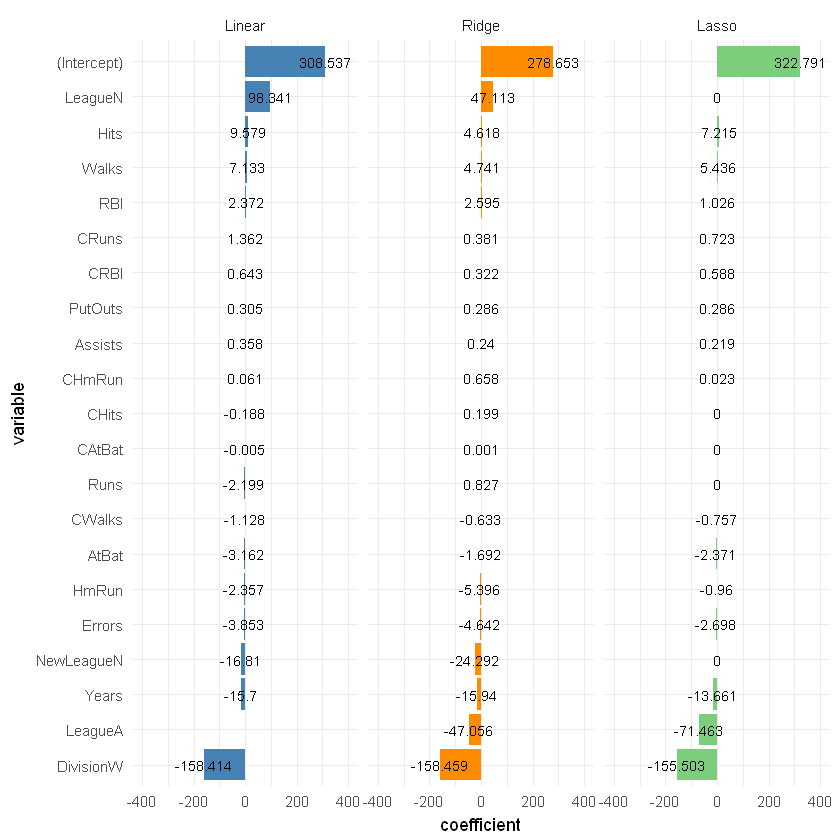

In [29]:
ridge.coef <- as.matrix(predict(ridge.fit, s = ridge.lambda, newx = x[-train.id,], type = "coefficients"))
lasso.coef <- as.matrix(predict(lasso.fit, s = lasso.lambda, newx = x[-train.id,], type = "coefficients"))

coef.df <- data.frame(variable = names(lm.fit$coefficients), coefficient = c(lm.fit$coefficients), 
                      method = "Linear", stringsAsFactors = F) %>%
bind_rows(data.frame(variable = rownames(ridge.coef), coefficient = c(ridge.coef),
                     method = "Ridge", stringsAsFactors = F)) %>%
bind_rows(data.frame(variable = rownames(lasso.coef), coefficient = c(lasso.coef), 
                     method = "Lasso", stringsAsFactors = F)) %>%
mutate(method = factor(method, levels = c('Linear', 'Ridge', 'Lasso')))

coef.df %>% ggplot(aes(reorder(variable, coefficient), coefficient, fill = method)) + geom_bar(stat = 'identity') + 
labs(x = "variable", y = "coefficient") +
geom_text(label = as.character(c(round((coef.df %>% filter(method == "Linear") %>% select(coefficient))$coefficient, 3),
 round((coef.df %>% filter(method == "Ridge") %>% select(coefficient))$coefficient, 3),
 round((coef.df %>% filter(method == "Lasso") %>% select(coefficient))$coefficient, 3))), size = 3) +
facet_grid(. ~ method) + coord_flip() + theme_minimal() + ylim(c(-400, 400)) +
scale_fill_manual(name = '', 
                  values =c('Linear' = 'steelblue',
                            'Ridge' = 'darkorange', 
                            'Lasso' = 'palegreen3')) +
theme(legend.position = 'none')

lasso의 경우 몇몇 변수들의 회귀 계수가 0이 된 것을 확인할 수 있다.

# Elastic Net
Elastic net은 $L_1 \text{ } norm$과 $L_2 \text{ } norm$을 혼합하여 사용하는 방법이다.
$$\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^k \beta_jx_{ij})^2 + \lambda((1-\alpha)\cdot\sum_{j=1}^k \beta_j^2 + \alpha\cdot\sum_{j=1}^n \lvert\beta_j\rvert) $$
$\alpha = 1$이면 Lasso, $\alpha = 0$이면 Ridge가 된다.

   alpha     rmse   lambda
1   0.00 305.0971 8.111308
2   0.05 306.3093 6.135907
3   0.10 307.5384 4.641589
4   0.15 302.1424 8.111308
5   0.20 308.2912 3.511192
6   0.25 305.3914 4.641589
7   0.30 304.8395 4.641589
8   0.35 298.3696 8.111308
9   0.40 306.1014 3.511192
10  0.45 302.7708 4.641589
11  0.50 304.9791 3.511192
12  0.55 304.3893 3.511192
13  0.60 306.4340 2.656088
14  0.65 308.2538 2.009233
15  0.70 305.4583 2.656088
16  0.75 307.4591 2.009233
17  0.80 301.4117 3.511192
18  0.85 300.7267 3.511192
19  0.90 300.1436 3.511192
20  0.95 305.9950 2.009233
21  1.00 305.7027 2.009233


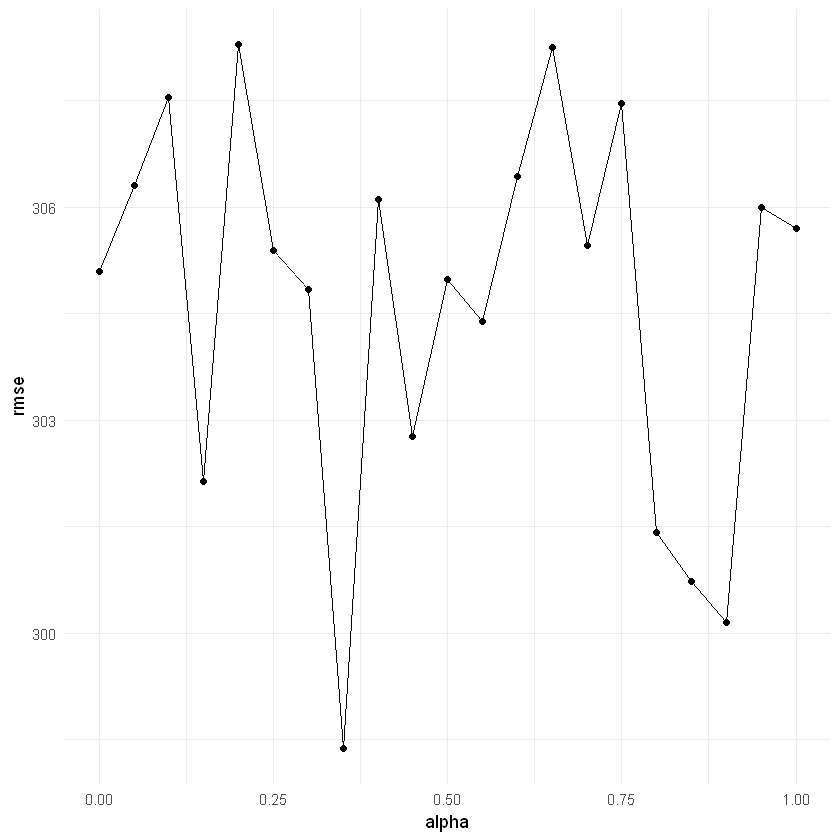

In [6]:
result <- data.frame()
for (alpha in seq(0, 1, 0.05)) {
    elastic.fit <- cv.glmnet(x[train.id,], y[train.id], alpha = alpha, lambda = grid)
    predict <- predict(elastic.fit, s = elastic.fit$lambda.min, newx = x[-train.id,])
    
    result <- result %>% bind_rows(data.frame(alpha = alpha, 
                                              rmse = sqrt(mean((predict - y[-train.id])^2)),
                                              lambda = elastic.fit$lambda.min))
}

ggplot(result, aes(alpha, rmse)) + geom_point() + geom_line() + theme_minimal()
print(result)